In [2]:
from google.cloud import bigquery
from google.oauth2 import service_account

## construct credentials from service account key file
credentials = service_account.Credentials.from_service_account_file(
    'tche368-isom676-srvacct_srvacct.json') ## relative file path
## '/mnt/c/Users/PGU6/workspace-GBS/student-technology-tools/docs/gcp/.ssl/bq_srv_acct.json') ## absolute file path

## construct a BigQuery client object
client = bigquery.Client(credentials=credentials)

## Your logics implementation goes below
# Perform a query.
# Define your query
QUERY = (
    'select * '
    'from machine_learning.transactions a '
    'left join machine_learning.products b on a.prod_id  = b.prod_id '
    'where sales_amt < 0 '
    'and trans_dt < "2020-03-01" '
    'limit 1000'

)

# Execute the query
query_job = client.query(QUERY)  # API request

# Save the query result to a DataFrame
df = query_job.to_dataframe()  # Waits for query to finish and converts it to DataFrame

In [3]:
df

,trans_id,trans_dt,store_id,cust_id,prod_id,sales_amt,sales_qty,sales_wgt,prod_id_1,prod_desc,prod_section,prod_category,prod_subcategory,prod_type,prod_mfc_brand_cd,prod_unit_qty_count,prod_count_uom,prod_uom_value
0,190728012170304307,2019-07-28,1217,60002907364990,21171818,-29.00,-1,0.0,21171818,ACSE JF POL PLST CATEYE W.MTL TEMPL,Eyewear,Optical,Sunglasses,Drugstore,ACSE,1,EA,1.0
1,190728012170304307,2019-07-28,1217,60002907364990,21171826,-29.00,-1,0.0,21171826,ACSE JF POL PLST MOD WAY W.MTL DECO,Eyewear,Optical,Sunglasses,Drugstore,ACSE,1,EA,1.0
2,190728012170304306,2019-07-28,1217,33244557102,21171886,-19.00,-1,0.0,21171886,ACSE JF PLST AVIATOR,Eyewear,Optical,Sunglasses,Drugstore,ACSE,1,EA,1.0
3,190729012170402964,2019-07-29,1217,1126432016,20650081,-6.45,1,0.0,20650081,Senior Discount,Coupons/Empties,Coupons,BASKET COUPONS,None,UNBR,1,EA,1.0
4,190729012270400471,2019-07-29,1227,1113374802,20650081,-6.74,1,0.0,20650081,Senior Discount,Coupons/Empties,Coupons,BASKET COUPONS,None,UNBR,1,EA,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,190731010280506647,2019-07-31,1028,1131111787,20047851,-0.02,1,0.0,20047851,ACSE GREEN PC POINTS,Coupons/Empties,Coupons,PCF Coupons,None,ACSE,1,EA,1.0
996,190731010280506786,2019-07-31,1028,1127307741,20668578,-0.02,1,0.0,20668578,PENNY ROUNDING - DO NOT TOUCH,Coupons/Empties,Coupons,BASKET COUPONS,None,UNBR,1,EA,1.0
997,190731010280506702,2019-07-31,1028,1126732697,20668578,-0.01,1,0.0,20668578,PENNY ROUNDING - DO NOT TOUCH,Coupons/Empties,Coupons,BASKET COUPONS,None,UNBR,1,EA,1.0
998,190731010282604766,2019-07-31,1028,1006597383,20527440,-1.20,1,0.0,20527440,COLL DISC PROG DISC,Coupons/Empties,Coupons,BASKET COUPONS,None,UNBR,1,EA,1.0


In [22]:
from google.cloud import bigquery
from google.oauth2 import service_account

## construct credentials from service account key file
credentials = service_account.Credentials.from_service_account_file(
    'tche368-isom676-srvacct_srvacct.json') ## relative file path
## '/mnt/c/Users/PGU6/workspace-GBS/student-technology-tools/docs/gcp/.ssl/bq_srv_acct.json') ## absolute file path

## construct a BigQuery client object
client = bigquery.Client(credentials=credentials)

## Your logics implementation goes below
# Perform a query.
# Define your query
QUERY = (
    'SELECT '
        'tx.cust_id '
    'FROM '
        '`machine_learning.transactions` tx '
    'LEFT JOIN `machine_learning.products` p ON tx.prod_id = p.prod_id '
    'WHERE '
        'p.prod_type NOT IN ("Lottery - Electronic", "Gift Cards", "Other", "Front End Service", "Scanning Errors", "Customer Service-Misc", "Empties and Additionals") '
        'AND tx.trans_dt < "2020-03-01" '
        'AND ((tx.sales_qty > 0 AND tx.sales_wgt = 0) OR (tx.sales_wgt > 0 AND tx.sales_qty = 0)) '
    'GROUP BY '
        'tx.cust_id '
    'HAVING '
        'COUNT(DISTINCT tx.trans_id) >= 5 '
        'AND COUNT(DISTINCT tx.trans_dt) >= 5 '
        'AND COUNT(tx.trans_id) <= 20000 '
        'AND AVG(tx.sales_amt) > (SELECT AVG(sales_amt) - 2 * STDDEV(sales_amt) FROM `machine_learning.transactions`) '
        'AND AVG(tx.sales_amt) < (SELECT AVG(sales_amt) + 2 * STDDEV(sales_amt) FROM `machine_learning.transactions`)'
)

In [11]:
# Execute the query
query_job = client.query(QUERY)  # API request

# Save the query result to a DataFrame
tmp_df  = query_job.to_dataframe()  # Waits for query to finish and converts it to DataFrame

In [12]:
tmp_df

,cust_id
0,1100275116
1,1075989201
2,1137388817
3,1014876583
4,1146404667
...,...
2628607,1113009488
2628608,33241205782
2628609,60002435390360
2628610,33230386359


In [23]:
from google.cloud import bigquery
from google.oauth2 import service_account

## construct credentials from service account key file
credentials = service_account.Credentials.from_service_account_file(
    'tche368-isom676-srvacct_srvacct.json') ## relative file path
## '/mnt/c/Users/PGU6/workspace-GBS/student-technology-tools/docs/gcp/.ssl/bq_srv_acct.json') ## absolute file path

## construct a BigQuery client object
client = bigquery.Client(credentials=credentials)

## Your logics implementation goes below
# Perform a query.
# Define your query
QUERY = (
    "WITH ranked_transactions AS ("
        "SELECT tx.*, "
        "ROW_NUMBER() OVER(PARTITION BY tx.cust_id, tx.trans_dt ORDER BY tx.trans_id) as rn "
    "FROM `machine_learning.transactions` tx "
    "JOIN ("
        "SELECT DISTINCT cust_id "
        "FROM `machine_learning.transactions` tx "
        "INNER JOIN `machine_learning.products` p ON tx.prod_id = p.prod_id "
        "WHERE p.prod_type NOT IN ('Lottery - Electronic', 'Gift Cards', 'Other', 'Front End Service', 'Scanning Errors', 'Customer Service-Misc', 'Empties and Additionals') "
        "AND tx.trans_dt < '2020-03-01' "
        "AND ((tx.sales_qty > 0 AND tx.sales_wgt = 0) OR (tx.sales_wgt > 0 AND tx.sales_qty = 0)) "
        "GROUP BY cust_id "
        "HAVING COUNT(DISTINCT tx.trans_id) >= 5 "
        "AND COUNT(DISTINCT tx.trans_dt) >= 5 "
        "AND COUNT(tx.trans_id) <= 20000 "
        "AND AVG(tx.sales_amt) > (SELECT AVG(sales_amt) - 2 * STDDEV(sales_amt) FROM `machine_learning.transactions`) "
        "AND AVG(tx.sales_amt) < (SELECT AVG(sales_amt) + 2 * STDDEV(sales_amt) FROM `machine_learning.transactions`)"
    ") eligible_custs ON tx.cust_id = eligible_custs.cust_id "
    "WHERE tx.trans_dt < '2020-03-01'), "
"filtered_transactions AS ("
    "SELECT * "
    "FROM ranked_transactions "
    "WHERE rn <= 10 "
") "
"SELECT tx.* "
"FROM `machine_learning.transactions` tx "
"JOIN filtered_transactions ft ON tx.trans_id = ft.trans_id "
"WHERE tx.trans_dt < '2020-03-01'"
)



# Execute the query
query_job = client.query(QUERY)  # API request

# Save the query result to a DataFrame
tmp_df1  = query_job.to_dataframe()  # Waits for query to finish and converts it to DataFrame

Forbidden: 403 Response too large to return. Consider specifying a destination table in your job configuration. For more details, see https://cloud.google.com/bigquery/troubleshooting-errors; reason: responseTooLarge, message: Response too large to return. Consider specifying a destination table in your job configuration. For more details, see https://cloud.google.com/bigquery/troubleshooting-errors

Location: us-east4
Job ID: 77b49f1b-34de-4074-92f7-92a10d9c0f49


In [17]:
tmp_df

,cust_id
0,1100275116
1,1075989201
2,1137388817
3,1014876583
4,1146404667
...,...
2628607,1113009488
2628608,33241205782
2628609,60002435390360
2628610,33230386359


In [42]:
from google.cloud import bigquery
from google.oauth2 import service_account

## construct credentials from service account key file
credentials = service_account.Credentials.from_service_account_file(
    'tche368-isom676-srvacct_srvacct.json') ## relative file path
## '/mnt/c/Users/PGU6/workspace-GBS/student-technology-tools/docs/gcp/.ssl/bq_srv_acct.json') ## absolute file path

## construct a BigQuery client object
client = bigquery.Client(credentials=credentials)

## Your logics implementation goes below
# Perform a query.
# Define your query
QUERY = (
    'WITH eligible_custs AS ('
        'SELECT DISTINCT cust_id '
        'FROM `machine_learning.transactions` tx '
        'INNER JOIN `machine_learning.products` p ON tx.prod_id = p.prod_id '
        'WHERE p.prod_type NOT IN ("Lottery - Electronic", "Gift Cards", "Other", "Front End Service", "Scanning Errors", "Customer Service-Misc", "Empties and Additionals") '
        'AND tx.trans_dt < "2020-03-01" '
        'AND ((tx.sales_qty > 0 AND tx.sales_wgt = 0) OR (tx.sales_wgt > 0 AND tx.sales_qty = 0)) '
        'GROUP BY cust_id '
        'HAVING COUNT(DISTINCT tx.trans_id) >= 5 '
        'AND COUNT(DISTINCT tx.trans_dt) >= 5 '
        'AND COUNT(tx.trans_id) <= 20000 '
        'AND AVG(tx.sales_amt) > (SELECT AVG(sales_amt) - 2 * STDDEV(sales_amt) FROM `machine_learning.transactions`) '
        'AND AVG(tx.sales_amt) < (SELECT AVG(sales_amt) + 2 * STDDEV(sales_amt) FROM `machine_learning.transactions`)), '
    'sampled_custs AS ('
        'SELECT cust_id '
        'FROM eligible_custs '
        'WHERE MOD(ABS(FARM_FINGERPRINT(CAST(cust_id AS STRING))), 100) < 1) '
    'SELECT tx.* '
    'FROM `machine_learning.transactions` tx '
    'JOIN sampled_custs ON tx.cust_id = sampled_custs.cust_id '
    'WHERE tx.trans_dt < "2020-03-01"'
)




# Execute the query
query_job = client.query(QUERY)  # API request

# Save the query result to a DataFrame
samp_df  = query_job.to_dataframe()  # Waits for query to finish and converts it to DataFrame

KeyboardInterrupt: 

In [26]:
samp_df

,trans_id,trans_dt,store_id,cust_id,prod_id,sales_amt,sales_qty,sales_wgt
0,170624010270102691,2017-06-24,1027,1127533545,20981575,17.98,2,0.0
1,170624010270102702,2017-06-24,1027,1015008124,20001552,11.88,12,0.0
2,170624010270807724,2017-06-24,1027,60002978459060,20302329,2.79,1,0.0
3,170624010272407218,2017-06-24,1027,1134995304,20757871,2.99,1,0.0
4,170624010270807724,2017-06-24,1027,60002978459060,20035921,4.49,1,0.0
...,...,...,...,...,...,...,...,...
8640819,180505010230303855,2018-05-05,1023,1127015633,20645558,6.99,1,0.0
8640820,180505010230409324,2018-05-05,1023,1125094262,21048165,6.99,1,0.0
8640821,180505010230105425,2018-05-05,1023,60003108226300,20067326001,6.99,1,0.0
8640822,180505010230105425,2018-05-05,1023,60003108226300,20767998001,6.99,1,0.0


In [27]:
sum_value = samp_df.groupby('cust_id')['sales_amt'].sum().reset_index().sort_values('sales_amt', ascending=False)
sum_value

,cust_id,sales_amt
6421,1124802816,60981.71
10445,1130812928,58124.59
6066,1124279575,54840.13
11931,1133610555,51110.71
8072,1127024256,48521.08
...,...,...
25654,60003109038220,2.30
11450,1132614251,0.45
13798,1142823565,-7.60
20249,33253595893,-61.95


In [124]:
from google.cloud import bigquery
from google.oauth2 import service_account

# Construct credentials from service account key file
credentials = service_account.Credentials.from_service_account_file(
    'tche368-isom676-srvacct_srvacct.json')  # Update the file path as needed

# Construct a BigQuery client object
client = bigquery.Client(credentials=credentials)

# Revised and optimized query
QUERY = """
WITH product_filter AS (
    SELECT *
    FROM `machine_learning.products`
    WHERE prod_category NOT IN ("Gift Cards", "Other", "Front End Service", "Scanning Errors", "Customer Service-Misc", "Empties and Additionals")
),
valid_transactions AS (
    SELECT *
    FROM `machine_learning.transactions` a 
    join product_filter b on a.prod_id  = b.prod_id 
    WHERE trans_dt < "2020-03-01"
    AND a.prod_id IN (SELECT prod_id FROM product_filter)
        AND 
        -- Logic 1: Either sales_qty or sales_wgt is zero, but not both
        ((sales_qty = 0 AND sales_wgt <> 0) OR (sales_qty <> 0 AND sales_wgt = 0) or (sales_qty =1  AND sales_wgt <> 0))
        AND 
        -- Logics 2 and 3 are parallel conditions
        (
            (prod_category NOT IN ("Coupon", "returns") AND (sales_qty > 0 OR sales_wgt > 0))
            OR
            (prod_category IN ("Coupon", "returns") AND (sales_qty < 0 OR sales_wgt < 0))
        )
    AND sales_amt >= 0
),
transactions_per_day AS (
    SELECT cust_id, trans_dt, COUNT(DISTINCT trans_id) AS trans_per_day
    FROM valid_transactions
    GROUP BY cust_id, trans_dt
    HAVING trans_per_day <= 10
),
eligible_custs AS (
    SELECT v.cust_id
    FROM valid_transactions v
    JOIN transactions_per_day tpd ON v.cust_id = tpd.cust_id AND v.trans_dt = tpd.trans_dt
    GROUP BY v.cust_id
    HAVING COUNT(DISTINCT v.trans_id) >= 5
    AND COUNT(DISTINCT v.trans_dt) >= 5
    AND COUNT(v.trans_id) <= 20000
),
sampled_custs AS (
    SELECT cust_id
    FROM eligible_custs
    WHERE MOD(ABS(FARM_FINGERPRINT(CAST(cust_id AS STRING))), 1000) < 1
)
SELECT tx.*
FROM `valid_transactions` tx
JOIN sampled_custs ON tx.cust_id = sampled_custs.cust_id
WHERE tx.trans_dt < "2020-03-01"
"""

# Execute the query
query_job = client.query(QUERY)  # API request

# Convert to DataFrame
samp_df1 = query_job.to_dataframe()  # Waits for query to finish and converts it to DataFrame


In [125]:
samp_df1

,trans_id,trans_dt,store_id,cust_id,prod_id,sales_amt,sales_qty,sales_wgt,prod_id_1,prod_desc,prod_section,prod_category,prod_subcategory,prod_type,prod_mfc_brand_cd,prod_unit_qty_count,prod_count_uom,prod_uom_value
0,170624010320609653,2017-06-24,1032,1040376702,20615947001,5.49,1,0.0,20615947001,KINNIKINNICK WHITE BREAD GF,Natural Foods,Natural Foods,Frozen-Natural Foods,Loaves,KNNC,1,G,454.0
1,170624010400204876,2017-06-24,1040,1127558271,20660168,3.49,1,0.0,20660168,ACSE BYO BUTTER CROISSANT,Bakery Instore,In-Store,Frozen/Seasonal-In-S,Bake at Home,ACSE,1,G,210.0
2,170624010500903927,2017-06-24,1050,1127904558,20088725,11.99,1,0.0,20088725,JTDRY/FIN TURBO DRY,Grocery,Household Cleaning Needs,Dish-Household Clean,Auto Rinse Aid,FNSH,1,ML,500.0
3,170624011320203117,2017-06-24,1132,1129755676,20113825,7.00,1,0.0,20113825,PROSOLVE/RESOLVE TRIPLE ACTION,Grocery,Household Cleaning Needs,Cleaners-Household C,Floor Care,RSLV,1,ML,650.0
4,170624011320203117,2017-06-24,1132,1129755676,20033269,2.99,1,0.0,20033269,SUNLIGHT LNDRY SOAP BAR TWIN,Grocery,Household Cleaning Needs,Laundry-Household Cl,Laundry Additive,SUNL,2,G,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881894,191219010820201741,2019-12-19,1082,1127191501,20298997005,3.00,1,0.0,20298997005,KETTLE HONEY DIJON,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,KETL,1,G,220.0
881895,191219010830405385,2019-12-19,1083,1014254972,20699207001,3.00,1,0.0,20699207001,KETTLE MAPLE BACON,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,KETL,1,G,220.0
881896,191219010830405385,2019-12-19,1083,1014254972,21057253,3.00,1,0.0,21057253,KETTLE CHIPS SRIRACHA,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,KETL,1,G,220.0
881897,191219010072800863,2019-12-19,1007,1132490853,21058854,6.00,2,0.0,21058854,KETTLE CHPS AVC HIMALAYAN SALT,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,KETL,1,G,170.0


In [126]:
sum_value = samp_df1.groupby('cust_id')['sales_amt'].sum().reset_index().sort_values('sales_amt', ascending=False)
sum_value

,cust_id,sales_amt
45,1008740211,38435.44
645,1124764327,38043.36
676,1125265308,32094.59
865,1127904558,27205.23
756,1126371663,26748.79
...,...,...
2350,60002877569750,20.95
2219,60002654101070,20.02
654,1124957604,9.99
1184,1132614251,0.45


# Q3 

## Q3 Profit

In [169]:
pro_QUERY = """

    SELECT * 
    FROM `machine_learning.products`

"""

# Execute the query
query_job = client.query(pro_QUERY)  # API request

# Convert to DataFrame
products_df = query_job.to_dataframe()  # Waits for query to finish and converts it to DataFrame

In [87]:
products_df 

,prod_id,prod_desc,prod_section,prod_category,prod_subcategory,prod_type,prod_mfc_brand_cd,prod_unit_qty_count,prod_count_uom,prod_uom_value
0,20971208,20 OFF WYB 150 PTIO BBQ,Home,Outdoor Living,Bbq,None,UNGM,1,EA,1.00
1,20004449,EXCHANGEABLE CYLINDER 8KG,Home,Outdoor Living,Bbq,Fuel,JOIE,1,EA,1.00
2,20012005,ACSE CHARCOAL BRIQUETTE 16.6LB,Home,Outdoor Living,Bbq,Fuel,ACSE,1,KG,8.18
3,20027522,STAR GRILL LUMP CHARCOAL 10LB,Home,Outdoor Living,Bbq,Fuel,JOIE,1,KG,4.54
4,20027885,PRE-FILLED NEW CYLINDER 8KG,Home,Outdoor Living,Bbq,Fuel,JOIE,1,EA,1.00
...,...,...,...,...,...,...,...,...,...,...
154813,21208141,ACSE EMBROIDERED FLAG PATCH,Home,Seasonal,Lunitunia Day-Seasonal,Lunitunia Day Accessories,ACSE,1,EA,1.00
154814,21208142,ACSE GLITTER COIL NOTEBOOK,Home,Seasonal,Lunitunia Day-Seasonal,Lunitunia Day Accessories,ACSE,1,EA,1.00
154815,21208143,ACSE SHOPPING BAG,Home,Seasonal,Lunitunia Day-Seasonal,Lunitunia Day Accessories,ACSE,1,EA,1.00
154816,21208144,ACSE SEQUIN FLAG PATCH,Home,Seasonal,Lunitunia Day-Seasonal,Lunitunia Day Accessories,ACSE,1,EA,1.00


In [127]:
sample_transaction = samp_df1
sample_transaction

,trans_id,trans_dt,store_id,cust_id,prod_id,sales_amt,sales_qty,sales_wgt,prod_id_1,prod_desc,prod_section,prod_category,prod_subcategory,prod_type,prod_mfc_brand_cd,prod_unit_qty_count,prod_count_uom,prod_uom_value
0,170624010320609653,2017-06-24,1032,1040376702,20615947001,5.49,1,0.0,20615947001,KINNIKINNICK WHITE BREAD GF,Natural Foods,Natural Foods,Frozen-Natural Foods,Loaves,KNNC,1,G,454.0
1,170624010400204876,2017-06-24,1040,1127558271,20660168,3.49,1,0.0,20660168,ACSE BYO BUTTER CROISSANT,Bakery Instore,In-Store,Frozen/Seasonal-In-S,Bake at Home,ACSE,1,G,210.0
2,170624010500903927,2017-06-24,1050,1127904558,20088725,11.99,1,0.0,20088725,JTDRY/FIN TURBO DRY,Grocery,Household Cleaning Needs,Dish-Household Clean,Auto Rinse Aid,FNSH,1,ML,500.0
3,170624011320203117,2017-06-24,1132,1129755676,20113825,7.00,1,0.0,20113825,PROSOLVE/RESOLVE TRIPLE ACTION,Grocery,Household Cleaning Needs,Cleaners-Household C,Floor Care,RSLV,1,ML,650.0
4,170624011320203117,2017-06-24,1132,1129755676,20033269,2.99,1,0.0,20033269,SUNLIGHT LNDRY SOAP BAR TWIN,Grocery,Household Cleaning Needs,Laundry-Household Cl,Laundry Additive,SUNL,2,G,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881894,191219010820201741,2019-12-19,1082,1127191501,20298997005,3.00,1,0.0,20298997005,KETTLE HONEY DIJON,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,KETL,1,G,220.0
881895,191219010830405385,2019-12-19,1083,1014254972,20699207001,3.00,1,0.0,20699207001,KETTLE MAPLE BACON,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,KETL,1,G,220.0
881896,191219010830405385,2019-12-19,1083,1014254972,21057253,3.00,1,0.0,21057253,KETTLE CHIPS SRIRACHA,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,KETL,1,G,220.0
881897,191219010072800863,2019-12-19,1007,1132490853,21058854,6.00,2,0.0,21058854,KETTLE CHPS AVC HIMALAYAN SALT,Natural Foods,Natural Foods,Snacks-Natural Foods,Chips,KETL,1,G,170.0


In [100]:
# Load product and profit margin data
product_profit_margin_df = pd.read_excel("C:/Users/ctlan/OneDrive/desktop/AI at Scale/HW/Product Category Profit Margin.xlsx")
product_profit_margin_df

,prod_category,profit_margin
0,Bath & Beauty,0.700
1,Gas Bar,0.010
2,Skincare,0.650
3,Cosmetic Treatments,0.300
4,Sports,0.150
...,...,...
96,Savory,0.300
97,Optical,0.700
98,Household Paper Products,0.085
99,Wellness,0.200


In [128]:
# Load product and profit margin data
product_profit_margin_df = pd.read_excel("C:/Users/ctlan/OneDrive/desktop/AI at Scale/HW/Product Category Profit Margin.xlsx")

# Merge with product_profit_margin to get profit margins
merged_df = pd.merge(sample_transaction, product_profit_margin_df, on='prod_category', how='left')

# Calculate profit for each transaction
merged_df['profit'] = merged_df['sales_amt'] * merged_df['profit_margin']

# Aggregate to get total profit per store
total_profit_by_store = merged_df.groupby('store_id')['profit'].sum().reset_index()

# Sort stores by total profit and select top 10
top_stores_by_profit = total_profit_by_store.sort_values(by='profit', ascending=False).head(10)


top_stores_by_profit

,store_id,profit
21,1050,72482.77735
47,1212,60478.04310
19,1035,58522.26705
5,1007,54056.80620
12,1021,47282.40640
22,1051,46271.67130
8,1014,43862.71855
10,1019,43125.35065
41,1188,41467.93770
18,1032,41303.93950


## Q1 profit 

In [129]:
product_profit_margin_df = pd.read_excel("C:/Users/ctlan/OneDrive/desktop/AI at Scale/HW/Product Category Profit Margin.xlsx")

# Merge with product_profit_margin to get profit margins
merged_df = pd.merge(sample_transaction, product_profit_margin_df, on='prod_category', how='left')

# Calculate profit for each transaction
merged_df['profit'] = merged_df['sales_amt'] * merged_df['profit_margin']

total_profit_by_customer = merged_df.groupby('cust_id')['profit'].sum().reset_index()

# Sort stores by total profit and select top 10
top_customer_by_profit = total_profit_by_customer.sort_values(by='profit', ascending=False).head(10)


top_customer_by_profit

,cust_id,profit
45,1008740211,12178.41980
645,1124764327,10232.90645
676,1125265308,8371.51935
931,1128742376,8107.16355
1415,1142684801,7456.56025
1438,1143167569,7197.90830
756,1126371663,6973.89475
865,1127904558,6962.21885
1012,1129917824,6877.76415
1320,1136083110,6600.96960


### loyal customer analysis

In [130]:
import pandas as pd

# Assuming merged_df is prepared with columns 'cust_id' and 'profit'

# Mark loyal customers
merged_df['is_loyal'] = merged_df['cust_id'].apply(lambda x: len(str(x)) == 10)

# Calculate numbers of loyal and total customers
total_customers = merged_df['cust_id'].nunique()
loyal_customers = merged_df[merged_df['is_loyal']]['cust_id'].nunique()

# Calculate total and loyal customers' profit
total_profit = merged_df['profit'].sum()
loyal_customers_profit = merged_df[merged_df['is_loyal']]['profit'].sum()

# Calculate proportions
loyal_customers_ratio = loyal_customers / total_customers
loyal_customers_profit_ratio = loyal_customers_profit / total_profit

# Create the output DataFrame
output_df = pd.DataFrame({
    'Metric': ['Loyal Customer Ratio', 'Loyal Customer Profit Ratio'],
    'Value': [loyal_customers_ratio, loyal_customers_profit_ratio]
})

output_df


,Metric,Value
0,Loyal Customer Ratio,0.598602
1,Loyal Customer Profit Ratio,0.840934


### customer pattern analysis

In [110]:
from google.cloud import bigquery
from google.oauth2 import service_account

# Construct credentials from service account key file
credentials = service_account.Credentials.from_service_account_file(
    'tche368-isom676-srvacct_srvacct.json')  # Update the file path as needed

# Construct a BigQuery client object
client = bigquery.Client(credentials=credentials)

# Revised and optimized query
QUERY = """
WITH product_filter AS (
    SELECT *
    FROM `machine_learning.products`
    WHERE prod_category NOT IN ("Gift Cards", "Other", "Front End Service", "Scanning Errors", "Customer Service-Misc", "Empties and Additionals")
),
valid_transactions AS (
    SELECT *
    FROM `machine_learning.transactions` a 
    join product_filter b on a.prod_id  = b.prod_id 
    WHERE trans_dt < "2020-03-01"
    AND a.prod_id IN (SELECT prod_id FROM product_filter)
        AND 
        -- Logic 1: Either sales_qty or sales_wgt is zero, but not both
        ((sales_qty = 0 AND sales_wgt <> 0) OR (sales_qty <> 0 AND sales_wgt = 0))
        AND 
        -- Logics 2 and 3 are parallel conditions
        (
            (prod_category NOT IN ("Coupon", "returns") AND (sales_qty > 0 OR sales_wgt > 0))
            OR
            (prod_category IN ("Coupon", "returns") AND (sales_qty < 0 OR sales_wgt < 0))
        )
    AND sales_amt >= 0
),
transactions_per_day AS (
    SELECT cust_id, trans_dt, COUNT(DISTINCT trans_id) AS trans_per_day
    FROM valid_transactions
    GROUP BY cust_id, trans_dt
    HAVING trans_per_day <= 10
),
eligible_custs AS (
    SELECT v.cust_id
    FROM valid_transactions v
    JOIN transactions_per_day tpd ON v.cust_id = tpd.cust_id AND v.trans_dt = tpd.trans_dt
    GROUP BY v.cust_id
    HAVING COUNT(DISTINCT v.trans_id) >= 5
    AND COUNT(DISTINCT v.trans_dt) >= 5
    AND COUNT(v.trans_id) <= 20000
),
sampled_custs AS (
    SELECT cust_id
    FROM eligible_custs
    WHERE MOD(ABS(FARM_FINGERPRINT(CAST(cust_id AS STRING))), 200) < 1
)
SELECT tx.*
FROM `valid_transactions` tx
JOIN sampled_custs ON tx.cust_id = sampled_custs.cust_id
WHERE tx.trans_dt < "2020-03-01"
"""

# Execute the query
query_job = client.query(QUERY)  # API request

# Convert to DataFrame
sample_transaction = query_job.to_dataframe()  # Waits for query to finish and converts it to DataFrame


In [115]:
# Load product and profit margin data
product_profit_margin_df = pd.read_excel("C:/Users/ctlan/OneDrive/desktop/AI at Scale/HW/Product Category Profit Margin.xlsx")

# Merge with product_profit_margin to get profit margins
merged_df = pd.merge(sample_transaction, product_profit_margin_df, on='prod_category', how='left')

# Calculate profit for each transaction
merged_df['profit'] = merged_df['sales_amt'] * merged_df['profit_margin']

In [131]:
import pandas as pd

# Adjustments for accurately identifying customers by category

# Assuming merged_df is prepared with 'cust_id', 'prod_category', and 'sales_amt'

# Identify all unique customers
all_customers = merged_df['cust_id'].unique()

# 1. Never use coupon
# Find customers who have used coupons
customers_used_coupons = merged_df[merged_df['prod_category'] == 'Coupons']['cust_id'].unique()
# Find customers who have never used a coupon by excluding those who have
customers_never_use_coupon = set(all_customers) - set(customers_used_coupons)
# Calculate their profit
profit_never_use_coupon = merged_df[(merged_df['cust_id'].isin(customers_never_use_coupon)) & (~merged_df['prod_category'].str.contains('Coupons'))]['sales_amt'].sum()

# 2. Only buy One/Two/Three certain categories
# Count unique categories per customer
cust_category_counts = merged_df.groupby('cust_id')['prod_category'].nunique()
# Customers who only buy from 1, 2, or 3 categories
customers_one_two_three_categories = cust_category_counts[(cust_category_counts >= 1) & (cust_category_counts <= 3)].index
# Calculate their profit
profit_one_two_three_categories = merged_df[merged_df['cust_id'].isin(customers_one_two_three_categories)]['sales_amt'].sum()

# 3. Buy everything (50+ categories)
customers_buy_everything = cust_category_counts[cust_category_counts >= 50].index
# Calculate their profit
profit_buy_everything = merged_df[merged_df['cust_id'].isin(customers_buy_everything)]['sales_amt'].sum()

# Total numbers and profits
total_customers = len(all_customers)
total_profit = merged_df['sales_amt'].sum()

# Calculate proportions
data = {
    'Category': ['Never Use Coupon', 'Buy 1-3 Categories', 'Buy 50+ Categories'],
    'Customer Count Proportion': [
        len(customers_never_use_coupon) / total_customers,
        len(customers_one_two_three_categories) / total_customers,
        len(customers_buy_everything) / total_customers
    ],
    'Profit Proportion': [
        profit_never_use_coupon / total_profit,
        profit_one_two_three_categories / total_profit,
        profit_buy_everything / total_profit
    ]
}

# Create the output DataFrame
output_df = pd.DataFrame(data)

output_df


,Category,Customer Count Proportion,Profit Proportion
0,Never Use Coupon,0.488227,0.144544
1,Buy 1-3 Categories,0.012877,0.002914
2,Buy 50+ Categories,0.098970,0.492170


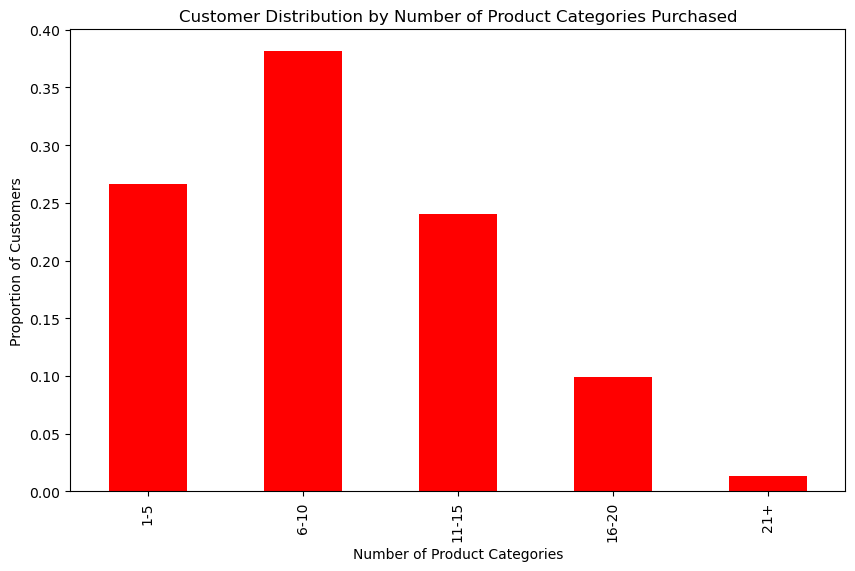

C:\Users\ctlan\AppData\Local\Temp\ipykernel_8688\1356858221.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_contribution_by_bin = customer_analysis_df.groupby('Category_Count_Bin')['Total_Profit'].sum()


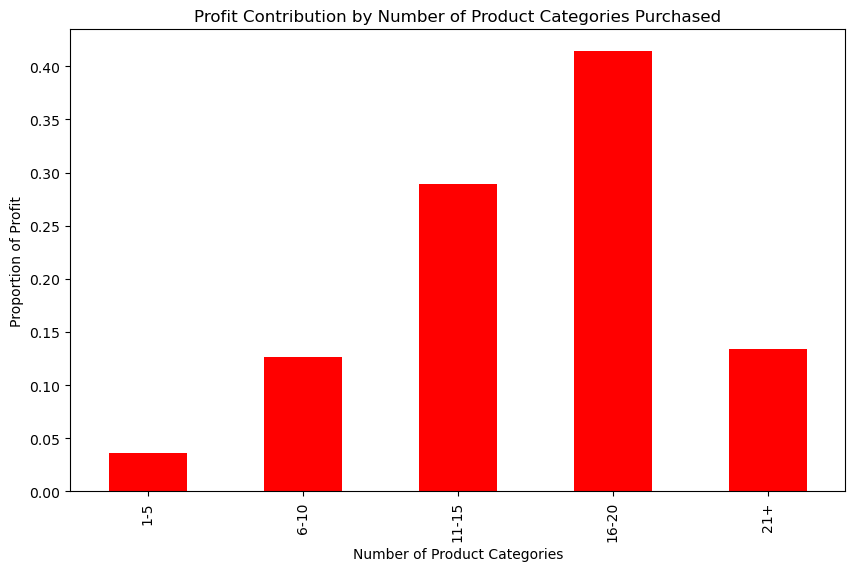

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is prepared with 'cust_id', 'prod_category', and 'sales_amt'

# Calculate the number of unique categories purchased by each customer
category_counts_per_customer = merged_df.groupby('cust_id')['prod_category'].nunique()

# Calculate the total profit by customer
profit_per_customer = merged_df.groupby('cust_id')['sales_amt'].sum()

# Merge the two series into a DataFrame for easier analysis
customer_analysis_df = pd.DataFrame({
    'Category_Count': category_counts_per_customer,
    'Total_Profit': profit_per_customer
})

# Define bins for the category count histogram
bins_category_count = pd.cut(customer_analysis_df['Category_Count'], bins=5, labels=['1-5', '6-10', '11-15', '16-20', '21+'])

# Plot histogram for the distribution of customers by category count
plt.figure(figsize=(10, 6))
bins_category_count.value_counts(normalize=True).sort_index().plot(kind='bar', color='red')
plt.title('Customer Distribution by Number of Product Categories Purchased')
plt.xlabel('Number of Product Categories')
plt.ylabel('Proportion of Customers')
plt.show()

# For profit contribution, first assign each customer to a bin based on their category count
customer_analysis_df['Category_Count_Bin'] = bins_category_count

# Then, calculate the total profit for each bin
profit_contribution_by_bin = customer_analysis_df.groupby('Category_Count_Bin')['Total_Profit'].sum()

# Normalize the profit contribution by the total profit to get the proportion
profit_contribution_by_bin_normalized = profit_contribution_by_bin / profit_contribution_by_bin.sum()

# Plot histogram for the profit contribution by category count bin
plt.figure(figsize=(10, 6))
profit_contribution_by_bin_normalized.plot(kind='bar', color='red')
plt.title('Profit Contribution by Number of Product Categories Purchased')
plt.xlabel('Number of Product Categories')
plt.ylabel('Proportion of Profit')
plt.show()


### T-test P value compare the sample data set 

In [147]:
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd

# Create a DataFrame with the provided data
data = {
    'Category': ['Never Use Coupon', 'Buy 1-3 Categories', 'Buy 50+ Categories'],
    'Customer Count Proportion 0.1%': [0.484003, 0.013765, 0.083333],
    'Profit Proportion 0.1%': [0.146583, 0.003421, 0.451492],
    'Customer Count Proportion 0.5%': [0.489452, 0.012824, 0.075960],
    'Profit Proportion 0.5%': [0.142310, 0.002219, 0.443786]
}

df = pd.DataFrame(data)

# We need to assume a total number of customers to convert proportions to counts
# Let's assume there are 1000 customers in each group for demonstration purposes
n_customers = 1000

# Calculate the observed counts of customers from the proportions
df['Customer Count 0.1%'] = df['Customer Count Proportion 0.1%'] * n_customers
df['Customer Count 0.5%'] = df['Customer Count Proportion 0.5%'] * n_customers

# Extract the counts for the category 'Buy 50+ Categories' to perform the z-test
count = df.loc[df['Category'] == 'Buy 50+ Categories', ['Customer Count 0.1%', 'Customer Count 0.5%']].values.flatten()
nobs = [n_customers, n_customers]  # The number of observations in each sample

# Perform the two-proportion z-test
stat, pval = proportions_ztest(count, nobs)

stat, pval


(0.6089316589517153, 0.5425697385586778)

In [148]:
# Initialize a list to hold the z-test results
ztest_results = []

# There are three comparisons to make:
# 1. Never Use Coupon
# 2. Buy 1-3 Categories
# 3. Buy 50+ Categories

# Loop through each category to perform the z-tests
for category in df['Category']:
    # Extract the counts for the current category to perform the z-test
    count = df.loc[df['Category'] == category, ['Customer Count 0.1%', 'Customer Count 0.5%']].values.flatten()
    
    # Perform the two-proportion z-test
    stat, pval = proportions_ztest(count, nobs)
    
    # Append the results to our list
    ztest_results.append((category, stat, pval))

# Convert the z-test results to a DataFrame
output_df = pd.DataFrame(ztest_results, columns=['Category', 'Z-Score', 'P-Value'])

output_df


,Category,Z-Score,P-Value
0,Never Use Coupon,-0.243773,0.807407
1,Buy 1-3 Categories,0.183715,0.854237
2,Buy 50+ Categories,0.608932,0.542570


### weight check

In [123]:
# Group by 'prod_id' and sum 'sales_wgt' for each product
product_sales_weight_sum = sample_transaction.groupby('prod_id')['sales_wgt'].sum().reset_index()

# Rename columns for clarity if desired
product_sales_weight_sum.columns = ['prod_id', 'total_sales_wgt']

# Sort the results by 'total_sales_wgt' in descending order
product_sales_weight_sum = product_sales_weight_sum.sort_values(by='total_sales_wgt', ascending=False).reset_index(drop=True)

product_sales_weight_sum

,prod_id,total_sales_wgt
0,20159199001,0.08
1,20794110,0.01
2,20760993,0.01
3,20000005,0.00
4,21114532,0.00
...,...,...
65369,20936612,0.00
65370,20936613,0.00
65371,20936618,0.00
65372,20936634,0.00


# Q5


In [155]:
import pandas as pd

# Assuming sample_transaction and product_profit_margin_df have been loaded correctly
# Load the product_profit_margin_df
product_profit_margin_df = pd.read_excel("C:/Users/ctlan/OneDrive/desktop/AI at Scale/HW/Product Category Profit Margin.xlsx")

# Merge with product_profit_margin to get profit margins
merged_df = pd.merge(sample_transaction, product_profit_margin_df, on='prod_category', how='left')

# Calculate profit for each transaction
merged_df['profit'] = merged_df['sales_amt'] * merged_df['profit_margin']

# KVI: Identify top 10 KVI based on total profit
kvi_top10 = merged_df.groupby('prod_id').agg(total_profit=('profit', 'sum')).reset_index().sort_values('total_profit', ascending=False).head(10)

# KVC: Identify top 10 KVC based on total profit
kvc_top10 = merged_df.groupby('prod_category').agg(total_profit=('profit', 'sum')).reset_index().sort_values('total_profit', ascending=False).head(10)

# Traffic items: Identify top 10 products based on sales quantity
traffic_top10 = merged_df.groupby('prod_id').agg(total_sales_qty=('sales_qty', 'sum')).reset_index().sort_values('total_sales_qty', ascending=False).head(10)

# Add 'Type' columns for differentiation
kvi_top10['Type'] = 'KVI'
kvc_top10['Type'] = 'KVC'
traffic_top10['Type'] = 'Traffic'

# Prepare KVC for final DataFrame (adjusting for consistent column names)
kvc_top10['prod_id'] = kvc_top10['prod_category']

# Create an empty list to hold data
data = []

# Add KVI data
for index, row in kvi_top10.iterrows():
    data.append({'Category': 'KVI', 'Ranking_Type': 'Profit', 'Value': row['prod_id']})

# Add KVC data
for index, row in kvc_top10.iterrows():
    data.append({'Category': 'KVC', 'Ranking_Type': 'Profit', 'Value': row['prod_category']})  # Use prod_category for clarity

# Add Traffic data
for index, row in traffic_top10.iterrows():
    data.append({'Category': 'Traffic', 'Ranking_Type': 'Sales Quantity', 'Value': row['prod_id']})

# Convert list to DataFrame
final_output_df = pd.DataFrame(data)

final_output_df

,Category,Ranking_Type,Value
0,KVI,Profit,20733932
1,KVI,Profit,20252014
2,KVI,Profit,20600985
3,KVI,Profit,20049221
4,KVI,Profit,21087193
5,KVI,Profit,20175355001
6,KVI,Profit,20821992
7,KVI,Profit,20188873
8,KVI,Profit,20145621001
9,KVI,Profit,20812144001


In [156]:
# Calculate the sum of profit for each product
kvi_sum_profit = merged_df.groupby('prod_id')['profit'].sum().reset_index().rename(columns={'profit': 'sum_profit'})

# Sort the products based on the sum of profit and get top 10 KVI
kvi_top10 = kvi_sum_profit.sort_values('sum_profit', ascending=False).head(10)

# Calculate the sum of profit for each product category
kvc_sum_profit = merged_df.groupby('prod_category')['profit'].sum().reset_index().rename(columns={'profit': 'sum_profit'})

# Sort the categories based on the sum of profit and get top 10 KVC
kvc_top10 = kvc_sum_profit.sort_values('sum_profit', ascending=False).head(10)

# Calculate the sum of sales amount for each product to identify traffic drivers
traffic_sum_sales_amt = merged_df.groupby('prod_id')['sales_amt'].sum().reset_index().rename(columns={'sales_amt': 'sum_sales_amt'})

# Sort the products based on the sum of sales amount to get top 10 traffic driving products
traffic_top10 = traffic_sum_sales_amt.sort_values('sum_sales_amt', ascending=False).head(10)

# Note: The resulting top 10 lists for KVI, KVC, and Traffic Drivers are stored in kvi_top10, kvc_top10, and traffic_top10 respectively


In [157]:
kvi_top10

,prod_id,sum_profit
10856,20733932,45596.6580
4704,20252014,4913.9130
8264,20600985,3655.7395
1121,20049221,3573.2325
28159,21087193,3280.5660
36877,20175355001,3081.2475
13363,20821992,2464.8570
4500,20188873,2444.2780
36577,20145621001,2284.0980
43615,20812144001,2278.6440


In [158]:
kvc_top10

,prod_category,sum_profit
60,Natural Foods,108059.8400
86,Vegetables,80817.7580
5,Breakfast,59983.6500
77,Snacks,51193.7130
40,HMR,50811.4140
35,Fruit,48987.3285
22,Dispensing,45722.7360
49,In-Store,40809.8775
19,Deli Cheese,38441.6480
10,Cold Beverages,37022.5590


In [159]:
traffic_top10

,prod_id,sum_sales_amt
10856,20733932,151988.86
36877,20175355001,20541.65
643,20027156,17210.00
4704,20252014,16379.71
36721,20159199001,14541.00
41507,20425775001,13442.76
4500,20188873,12221.39
36417,20128938001,11777.62
35670,20049778001,11561.18
36577,20145621001,11420.49


### Q4 promote products 

In [165]:


# Assuming sample_transaction has been loaded

# Exclude transactions with 'Coupons' category and 'In-Store'
sample_transaction_filtered = sample_transaction[(sample_transaction['prod_category'] != 'Coupons') & (sample_transaction['prod_category'] != 'In-Store')]

# Convert transaction dates to datetime format and extract the month
sample_transaction_filtered['month'] = pd.to_datetime(sample_transaction_filtered['trans_dt']).dt.to_period('M')

# Group by product and month to calculate monthly sales quantities, excluding 'Coupons'
monthly_sales_qty = sample_transaction_filtered.groupby(['prod_id', 'month'])['sales_qty'].sum().reset_index()

# Calculate the standard deviation of sales quantities for each product, fill NaN with 0
std_sales_qty = monthly_sales_qty.groupby('prod_id')['sales_qty'].std().fillna(0).reset_index().rename(columns={'sales_qty': 'std_sales_qty'})

# Determine "Often Promoted" threshold as the 75th percentile of standard deviations
threshold = std_sales_qty['std_sales_qty'].quantile(0.75)

# Identify "Often Promoted" products based on the threshold
std_sales_qty['promotion_frequency'] = std_sales_qty['std_sales_qty'].apply(lambda x: 'Often Promoted' if x >= threshold else 'Seldom/Never Promoted')

# Get top 20 "Often Promoted" products excluding 'Coupons', sorted by their standard deviation
top_20_often_promoted = std_sales_qty[std_sales_qty['promotion_frequency'] == 'Often Promoted'].sort_values('std_sales_qty', ascending=False).head(20)

# Merge with unique prod_id to prod_category mapping to add 'prod_category', excluding 'Coupons'
prod_id_to_category = sample_transaction_filtered[['prod_id', 'prod_category']].drop_duplicates()
top_20_often_promoted_with_category = pd.merge(top_20_often_promoted, prod_id_to_category, on='prod_id', how='left')

# The resulting DataFrame has top 20 often promoted products, excluding 'Coupons', with their categories
top_20_often_promoted_with_category


C:\Users\ctlan\AppData\Local\Temp\ipykernel_8688\3324356287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_transaction_filtered['month'] = pd.to_datetime(sample_transaction_filtered['trans_dt']).dt.to_period('M')


,prod_id,std_sales_qty,promotion_frequency,prod_category
0,20189092,393.022365,Often Promoted,Household
1,20745693,154.560021,Often Promoted,Garden
2,20131170001,153.833565,Often Promoted,Vegetables
3,20055266001,120.332856,Often Promoted,Fruit
4,20175355001,91.055438,Often Promoted,Fruit
5,20054039,86.163362,Often Promoted,Photo Image
6,20159690001,63.094072,Often Promoted,Fruit
7,21065203,56.976603,Often Promoted,Hardware/Automotive
8,20593619,56.438757,Often Promoted,Photo Image
9,20028593001,48.4934,Often Promoted,Fruit


## Q4 cheery picker 

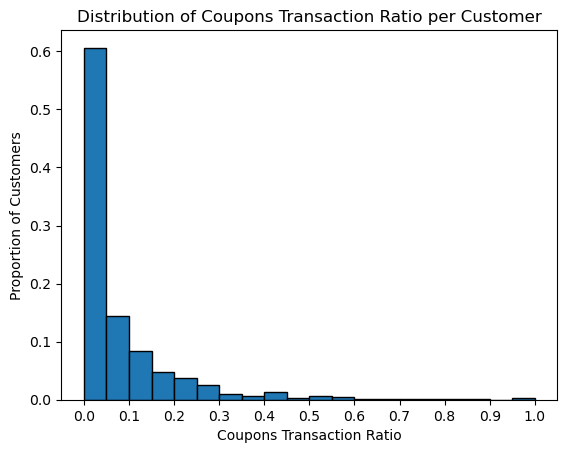

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设sample_transaction是已经加载的DataFrame，其中包含你提供的所有列。

# 首先，我们将计算每个cust_id对于prod_category为Coupons的transaction占比
# 1. 标记每个transaction是否为Coupons
sample_transaction['is_coupon'] = (sample_transaction['prod_category'] == 'Coupons').astype(int)

# 2. 对每个cust_id，计算总transaction数量和Coupons transaction的数量
cust_transactions_summary = sample_transaction.groupby('cust_id').agg(
    total_transactions=('trans_id', 'nunique'),  # 计算每个客户的唯一交易数
    coupons_transactions=('is_coupon', 'sum')  # 计算Coupons的交易数
)

# 3. 计算每个cust_id的Coupons transaction占比
cust_transactions_summary['coupons_ratio'] = cust_transactions_summary['coupons_transactions'] / cust_transactions_summary['total_transactions']

# 4. 绘制分布直方图，纵坐标为顾客数的比例
# 计算直方图
counts, bins = np.histogram(cust_transactions_summary['coupons_ratio'], bins=np.arange(0, 1.05, 0.05))

# 将计数转换为比例
counts = counts / counts.sum()

# 绘制直方图
plt.bar(bins[:-1], counts, width=0.05, align='edge', edgecolor='black')
plt.xlabel('Coupons Transaction Ratio')
plt.ylabel('Proportion of Customers')
plt.title('Distribution of Coupons Transaction Ratio per Customer')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()



## Q6 store ratio

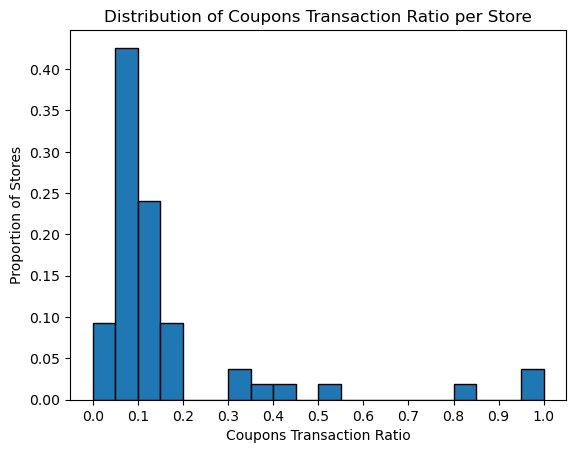

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming sample_transaction is a DataFrame that's already been loaded with all the columns provided.

# First, we'll calculate the proportion of transactions for each store_id that are for the product category 'Coupons'.
# 1. Mark each transaction whether it is for Coupons
sample_transaction['is_coupon'] = (sample_transaction['prod_category'] == 'Coupons').astype(int)

# 2. For each store_id, calculate the total number of transactions and the number of transactions for Coupons
store_transactions_summary = sample_transaction.groupby('store_id').agg(
    total_transactions=('trans_id', 'nunique'),  # Calculate the unique number of transactions per store
    coupons_transactions=('is_coupon', 'sum')  # Calculate the number of transactions for Coupons
)

# 3. Calculate the proportion of Coupons transactions for each store_id
store_transactions_summary['coupons_ratio'] = store_transactions_summary['coupons_transactions'] / store_transactions_summary['total_transactions']

# 4. Plot a histogram showing the distribution of the Coupons transaction ratio per store, with the y-axis representing the proportion of stores
# Calculate the histogram
counts, bins = np.histogram(store_transactions_summary['coupons_ratio'], bins=np.arange(0, 1.05, 0.05))

# Convert counts to proportions
counts = counts / counts.sum()

# Plot the histogram
plt.bar(bins[:-1], counts, width=0.05, align='edge', edgecolor='black')
plt.xlabel('Coupons Transaction Ratio')
plt.ylabel('Proportion of Stores')
plt.title('Distribution of Coupons Transaction Ratio per Store')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()


In [174]:
# Calculate the proportion of stores with a coupons transaction ratio greater than 0.3
proportion_above_03 = (store_transactions_summary['coupons_ratio'] > 0.3).mean()

print(f"Proportion of stores with a coupons transaction ratio greater than 0.3: {proportion_above_03:.2%}")


Proportion of stores with a coupons transaction ratio greater than 0.3: 14.81%


In [176]:
# Filter the stores with a coupons transaction ratio greater than 0.3
filtered_stores = store_transactions_summary[store_transactions_summary['coupons_ratio'] > 0.3]

# Sort these stores in descending order by the coupons transaction ratio
sorted_stores = filtered_stores.sort_values(by='coupons_ratio', ascending=False)

# Display the sorted DataFrame with store_ids and their respective coupons transaction ratio
sorted_stores_df = sorted_stores[['coupons_ratio']]
sorted_stores_df

,coupons_ratio
store_id,
1227,1.000000
1231,1.000000
1217,0.833333
1210,0.529412
1211,0.400000
1221,0.357143
1220,0.333333
1222,0.333333


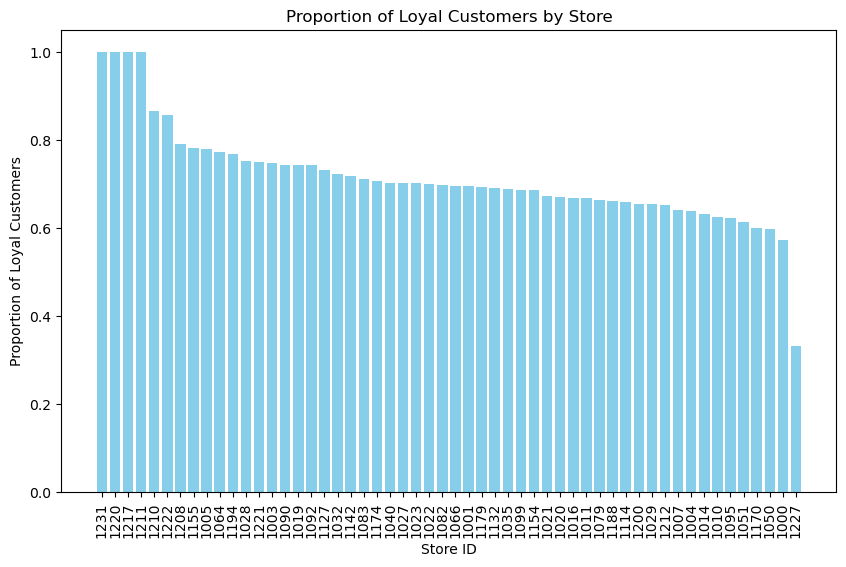

In [178]:
### loyal store 

# Step 1: Filter transactions to identify those by loyal customers
loyal_customers = sample_transaction[sample_transaction['cust_id'].apply(lambda x: len(str(x)) == 10)]

# Step 2: Calculate total and loyal customer visits per store
total_visits_per_store = sample_transaction.groupby('store_id')['cust_id'].nunique()
loyal_visits_per_store = loyal_customers.groupby('store_id')['cust_id'].nunique()

# Step 3: Calculate the proportion of loyal customer visits per store
proportion_loyal_visits = (loyal_visits_per_store / total_visits_per_store).fillna(0)

# Convert to DataFrame for easier handling and plotting
proportion_loyal_visits_df = proportion_loyal_visits.reset_index()
proportion_loyal_visits_df.columns = ['store_id', 'loyal_customer_proportion']

# Sort by proportion for better visualization
proportion_loyal_visits_df_sorted = proportion_loyal_visits_df.sort_values(by='loyal_customer_proportion', ascending=False)

# Step 4: Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(proportion_loyal_visits_df_sorted['store_id'].astype(str), proportion_loyal_visits_df_sorted['loyal_customer_proportion'], color='skyblue')
plt.xlabel('Store ID')
plt.ylabel('Proportion of Loyal Customers')
plt.title('Proportion of Loyal Customers by Store')
plt.xticks(rotation=90)  # Rotate store IDs for better readability
plt.show()

In [181]:

# Select the top 10 stores with the highest proportion of loyal customer visits
top_10_stores_by_loyal_customers = sorted_df_by_loyal_customers.head(10)

top_10_stores_by_loyal_customers

,store_id,loyal_customer_proportion
53,1231,1.000000
49,1220,1.000000
48,1217,1.000000
46,1211,1.000000
45,1210,0.866667
51,1222,0.857143
44,1208,0.791667
37,1155,0.781818
4,1005,0.780822
23,1064,0.773585
